In [3]:
import scanpy as sc
import pandas as pd
import numpy as np
from data_preprocess import preprocess_h5ad
import matplotlib as plt


In [4]:
#cell_x_topic_matrix=pd.read_csv('/volume1/home/pxie/topic_model/solution4/results/model_1_t_c.csv')
#cell_x_topic_matrix=pd.read_csv('/volume1/home/pxie/topic_model/solution4/results/model_2_t_c.csv')
#cell_x_topic_matrix=pd.read_csv("/volume1/home/pxie/topic_model/solution4/results/model_1_PBMC_t_c.csv")
#cell_x_topic_matrix=pd.read_csv("/volume1/home/pxie/topic_model/solution4/results/model_2_PBMC_t_c.csv")
cell_x_topic_matrix=pd.read_csv("/volume1/home/pxie/topic_model/ECRCTM/results/ecr_ctm_fusion_Cortex_t50_c.csv")#

In [5]:
#adata=preprocess_h5ad("/volume1/home/pxie/data/PBMC.h5ad")
#adata=preprocess_h5ad("/volume1/home/pxie/data/combined_data.h5ad")
adata=preprocess_h5ad("/volume1/home/pxie/data/Cortex.h5ad")
df = pd.DataFrame()
df['cell_type'] = adata.obs['cell_type']

In [6]:
adata1 = sc.AnnData(X=cell_x_topic_matrix)
adata1.obs['cell_type']=df['cell_type'].values.astype(str)
#adata1.obs["disease"]=df["disease"].values.astype(str)
topic_names = adata1.var_names


/usr/local/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


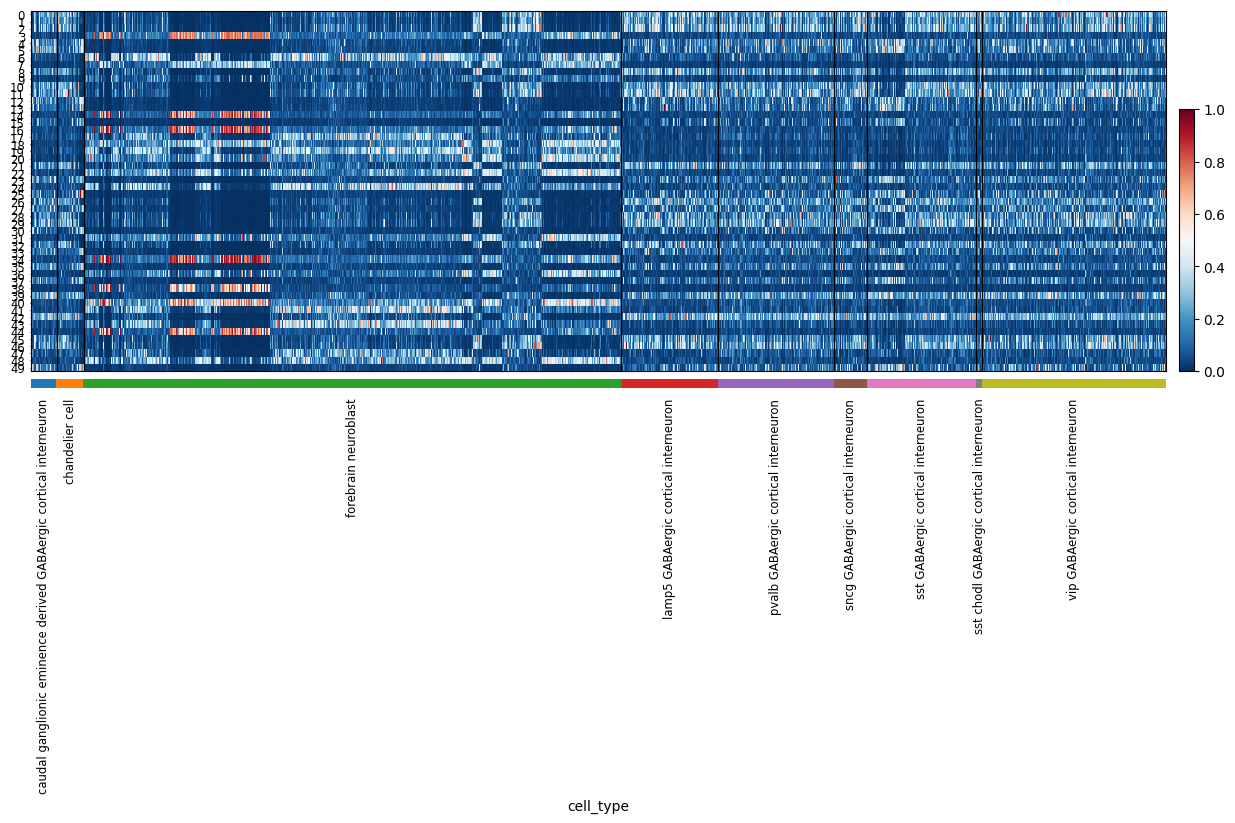

In [7]:
# 可以选择使用 obs 里面的标签（如细胞类型）来进行分组
sc.pl.heatmap(adata1, 
              var_names=topic_names,   # 显示的"基因"是各个主题
              groupby="cell_type",     
              swap_axes=True,
              cmap='RdBu_r',
              standard_scale='var',
              figsize=(15, 5)
            )          # 指定我们存储主题矩阵的位置